In [1]:
import numpy as np
import os

from matplotlib import pyplot as plt 

from steves_utils.stratified_dataset.traditional_accessor import Traditional_Accessor_Factory

from steves_utils.utils_v2 import get_datasets_base_path

In [2]:
N=100

In [3]:
from steves_utils.ORACLE.utils_v2 import (
    ALL_DISTANCES_FEET_NARROWED,
    ALL_RUNS,
    ALL_SERIAL_NUMBERS,
)

taf_source = Traditional_Accessor_Factory(
    labels=ALL_SERIAL_NUMBERS,
    domains=ALL_DISTANCES_FEET_NARROWED,
    num_examples_per_domain_per_label=100,
    pickle_path=os.path.join(get_datasets_base_path(), "oracle.Run2_framed_1300Examples_stratified_ds.2022A.pkl"),
    seed=1337
)
train_original_source, val_original_source, test_original_source = \
    taf_source.get_train(), taf_source.get_val(), taf_source.get_test()

oracle = []

it = iter(train_original_source)

for _ in range(N):
    x,_,_ = next(it)
    x = np.apply_along_axis(lambda args: [complex(*args)], 1, x.T).flatten()
    oracle.append(x) 

In [4]:
from steves_utils.CORES.utils import (
    ALL_NODES,
    ALL_NODES_MINIMUM_1000_EXAMPLES,
    ALL_DAYS
)

taf_source = Traditional_Accessor_Factory(
    labels=ALL_NODES,
    domains=[1],
    num_examples_per_domain_per_label=100,
    pickle_path=os.path.join(get_datasets_base_path(), "cores.stratified_ds.2022A.pkl"),
    seed=1337
)
train_original_source, val_original_source, test_original_source = \
    taf_source.get_train(), taf_source.get_val(), taf_source.get_test()

cores = []

it = iter(train_original_source)

for _ in range(N):
    x,_,_ = next(it)
    x = np.apply_along_axis(lambda args: [complex(*args)], 1, x.T).flatten()
    cores.append(x) 

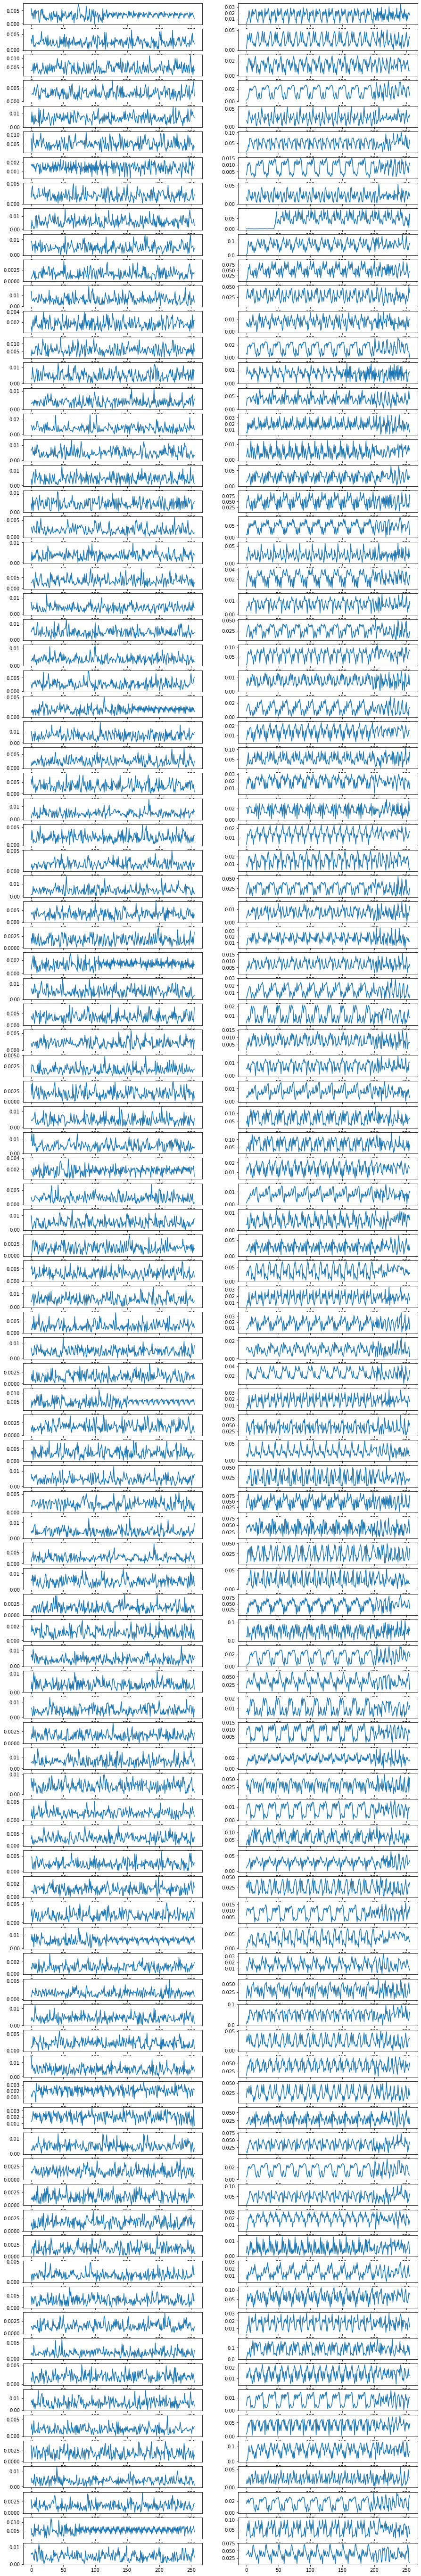

In [5]:
plt.figure(figsize=(15,100))


for i, (o,c) in enumerate(zip(oracle, cores)):
    oracle_ax = plt.subplot(N,2,i*2+1)
    cores_ax  = plt.subplot(N,2,i*2+2)
    
    oracle_ax.plot(range(len(o)),np.abs(o))
    cores_ax.plot(range(len(c)),np.abs(c))

ORACLE is sampled at 5Msps, the rest are at 25Msps